In [29]:
import time
import pandas
import geopandas
from pathlib import Path

In [30]:
shapefile = '../dataset/Igismap/Indian_States.shp'

In [31]:
gdf = geopandas.read_file(shapefile)

In [32]:
gdf.set_index('st_nm', inplace=True)

In [33]:
gdf.index.rename('states', inplace=True)

In [34]:
filename = Path('../dataset/moh_indian_data.csv')

In [37]:
if filename.exists() and (time.time() - filename.stat().st_ctime) < 60*60*4 :
    df = pandas.read_csv('../dataset/moh_indian_data.csv')
else:
    df = pandas.read_html('https://www.mohfw.gov.in/')[0]
    df = df.head(len(df)-1)
    df.to_csv('../dataset/moh_indian_data.csv')

In [39]:
df = df.replace(['Delhi', 'Union Territory of Jammu and Kashmir', 'Union Territory of Ladakh', 'Pondicherry'], 
                ['NCT of Delhi', 'Jammu & Kashmir', 'Jammu & Kashmir', 'Puducherry'])

In [40]:
df = df.groupby('Name of State / UT').sum()

In [41]:
df.index.rename('states', inplace=True)

In [42]:
gdf = gdf.merge(df, left_index=True, right_index=True)

In [43]:
gdf['total_cases'] = gdf['Total Confirmed cases (Indian National)'] + gdf['Total Confirmed cases ( Foreign National )']

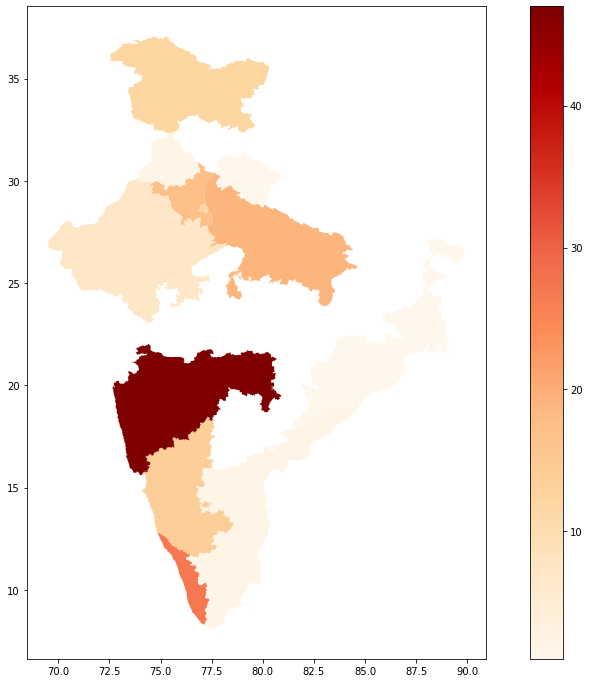

In [44]:
gdf.plot(column='total_cases', figsize=(16,12), cmap='OrRd', legend=True);